In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2
import numpy as np
from matplotlib import pyplot as plt


In [6]:
train_dir = 'Data/train'
test_dir = 'Data/test'

In [7]:
datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    )


train_data = datagen.flow_from_directory(
    train_dir,
    target_size=(128,128),
    class_mode='categorical')



test_data = datagen.flow_from_directory(
        test_dir,
        target_size=(128,128),
        batch_size=64,
        class_mode='categorical')

Found 40000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.


In [8]:
num_classes=10


model = Sequential()
model.add(Conv2D(filters = 32, padding = "same",activation = "relu",kernel_size=3, strides = 2,input_shape=(128,128,3)))
model.add(MaxPool2D(pool_size=(2,2),strides = 2))

model.add(Conv2D(filters = 32, padding = "same",activation = "relu",kernel_size=3))
model.add(MaxPool2D(pool_size=(2,2),strides = 2))

model.add(Flatten())
model.add(Dense(128,activation="relu"))


model.add(Dense(num_classes,kernel_regularizer=l2(0.01),activation = "softmax"))
model.summary()

model.compile(optimizer="adam",loss="squared_hinge", metrics = ['accuracy'])


hist = model.fit_generator(train_data,epochs=30,validation_data=test_data)

model.evaluate(test_data)

model.save('models/SVM model.h5')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

C:\Users\ymts0585\AppData\Local\Temp\ipykernel_12544\2862275991.py:21: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(train_data,epochs=30,validation_data=test_data)


Epoch 1/30
1250/1250 [==============================] - 578s 460ms/step - loss: 1.1028 - accuracy: 0.4779 - val_loss: 1.0530 - val_accuracy: 0.6158
Epoch 2/30
1250/1250 [==============================] - 672s 538ms/step - loss: 1.0410 - accuracy: 0.6416 - val_loss: 1.0286 - val_accuracy: 0.6779
Epoch 3/30
1250/1250 [==============================] - 645s 516ms/step - loss: 1.0242 - accuracy: 0.6884 - val_loss: 1.0132 - val_accuracy: 0.7185
Epoch 4/30
1250/1250 [==============================] - 626s 501ms/step - loss: 1.0146 - accuracy: 0.7152 - val_loss: 1.0066 - val_accuracy: 0.7335
Epoch 5/30
1250/1250 [==============================] - 583s 466ms/step - loss: 1.0061 - accuracy: 0.7375 - val_loss: 1.0017 - val_accuracy: 0.7512
Epoch 6/30
1250/1250 [==============================] - 591s 473ms/step - loss: 1.0008 - accuracy: 0.7520 - val_loss: 0.9985 - val_accuracy: 0.7561
Epoch 7/30
1250/1250 [==============================] - 621s 497ms/step - loss: 0.9965 - accuracy: 0.7638 - val_

C:\Users\ymts0585\AppData\Local\Temp\ipykernel_12544\1567053865.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(hist.history['accuracy'],'r',label='training accuracy',color='green')


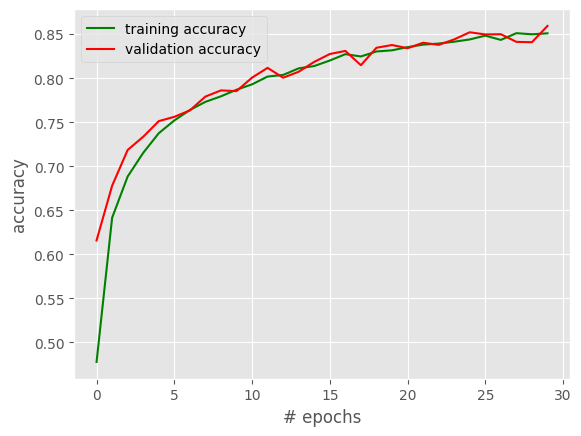

C:\Users\ymts0585\AppData\Local\Temp\ipykernel_12544\1567053865.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(hist.history['loss'],'r',label='training loss',color='green')


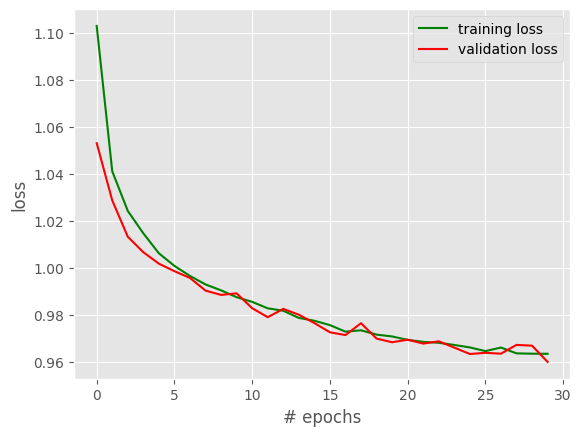

0.8593000173568726


In [9]:

plt.style.use("ggplot")
plt.figure()
plt.plot(hist.history['accuracy'],'r',label='training accuracy',color='green')
plt.plot(hist.history['val_accuracy'],label='validation accuracy',color='red')
plt.xlabel('# epochs')
plt.ylabel('accuracy')
plt.legend()
plt.savefig('models/SVM_acc.png')
plt.show()

plt.style.use("ggplot")
plt.figure()
plt.plot(hist.history['loss'],'r',label='training loss',color='green')
plt.plot(hist.history['val_loss'],label='validation loss',color='red')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.savefig('models/SVM_loss.png')
plt.show()


vgg_acc=hist.history['val_accuracy'][-1]

print(vgg_acc)